# 0. Setup Paths

In [83]:
import os

In [84]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_banana' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'


In [85]:

paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [86]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [87]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [88]:
if os.name=='nt':
    !pip install wget
    import wget

In [89]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [90]:
!pip install tensorflow==2.13.0

In [91]:
!pip install tf-models-official

In [92]:
!pip install pyyaml==5.3.1

In [93]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !pip install protobuf==3.20.3
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Processing /Users/cristy/Desktop/ObjectDetector/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1655512 sha256=0b1425c19e9e997b79bcfe21e872432f2ed51f79924685acc263e8fba034fcfb
  Stored in directory: /private/var/folders/r9/rjr3331s3slgkxhw5v4rdv900000gn/T/pip-ephem-wheel-cache-b1dh6uu8/wheels/4b/00/c8/99fadb14b89241282c835bc4f7a2822f0a3c8e5e92cb083fd3
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


### Note: If you encounter the error ModuleNotFoundError: No module named 'tensorflow.python.keras.layers.preprocessing' when running the cell below, please modify line #31 in tfod/lib/python(version)/site-packages/official/vision/image_classification/augment.py to the following: `from tensorflow.keras.preprocessing import image as image_ops`

In [96]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.6: /Users/cristy/Desktop/ObjectDetector/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0302 20:49:11.193348 8053673984 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
/Users/cristy/Desktop/ObjectDetector/tfod/lib/python3.9/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0302 20:49:11.312164 8053673984 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.25s
I0302 20:49:11.434773 8053673984 test_util.py:2462] time(__main__.ModelBuilderTF2Test.test_create_center_ne

I0302 20:49:13.352665 8053673984 efficientnet_model.py:147] round_filter input=24 output=24
I0302 20:49:13.352746 8053673984 efficientnet_model.py:147] round_filter input=40 output=40
I0302 20:49:13.429583 8053673984 efficientnet_model.py:147] round_filter input=40 output=40
I0302 20:49:13.429668 8053673984 efficientnet_model.py:147] round_filter input=80 output=80
I0302 20:49:13.541979 8053673984 efficientnet_model.py:147] round_filter input=80 output=80
I0302 20:49:13.542057 8053673984 efficientnet_model.py:147] round_filter input=112 output=112
I0302 20:49:13.741434 8053673984 efficientnet_model.py:147] round_filter input=112 output=112
I0302 20:49:13.741520 8053673984 efficientnet_model.py:147] round_filter input=192 output=192
I0302 20:49:13.892274 8053673984 efficientnet_model.py:147] round_filter input=192 output=192
I0302 20:49:13.892346 8053673984 efficientnet_model.py:147] round_filter input=320 output=320
I0302 20:49:13.930090 8053673984 efficientnet_model.py:147] round_filt

I0302 20:49:15.717222 8053673984 efficientnet_model.py:147] round_filter input=1280 output=1408
I0302 20:49:15.736115 8053673984 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv

I0302 20:49:18.308167 8053673984 efficientnet_model.py:147] round_filter input=16 output=24
I0302 20:49:18.308238 8053673984 efficientnet_model.py:147] round_filter input=24 output=40
I0302 20:49:18.485443 8053673984 efficientnet_model.py:147] round_filter input=24 output=40
I0302 20:49:18.485520 8053673984 efficientnet_model.py:147] round_filter input=40 output=64
I0302 20:49:18.666298 8053673984 efficientnet_model.py:147] round_filter input=40 output=64
I0302 20:49:18.666385 8053673984 efficientnet_model.py:147] round_filter input=80 output=128
I0302 20:49:19.046691 8053673984 efficientnet_model.py:147] round_filter input=80 output=128
I0302 20:49:19.046782 8053673984 efficientnet_model.py:147] round_filter input=112 output=176
I0302 20:49:19.313136 8053673984 efficientnet_model.py:147] round_filter input=112 output=176
I0302 20:49:19.313230 8053673984 efficientnet_model.py:147] round_filter input=192 output=304
I0302 20:49:19.679031 8053673984 efficientnet_model.py:147] round_filter

I0302 20:49:23.797840 8053673984 efficientnet_model.py:147] round_filter input=192 output=384
I0302 20:49:23.797917 8053673984 efficientnet_model.py:147] round_filter input=320 output=640
I0302 20:49:24.018864 8053673984 efficientnet_model.py:147] round_filter input=1280 output=2560
I0302 20:49:24.046582 8053673984 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=2.0, depth_coefficient=3.1, resolution=600, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=Fals

In [48]:
#!pip install tensorflow --upgrade

In [49]:
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib==3.2

In [97]:
import object_detection

In [98]:
!brew install wget
!pip list

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 1.21.4, run:
  brew reinstall wget
Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
anyio                         4.3.0
apache-beam                   2.54.0
appnope                       0.1.4
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.3.0
asttokens                     2.4.1
astunparse                    1.6.3
async-lru                     2.0.4
attrs                         23.2.0
avro-python3                  1.10.2
Babel                         2.14.0
beautifulsoup4                4.12.3
bleach                        6.1.0
ca

In [99]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2024-03-02 20:50:03--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 2607:f8b0:4008:814::201b, 2607:f8b0:4008:806::201b, 2607:f8b0:4008:80d::201b, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|2607:f8b0:4008:814::201b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  19.7MB/s    in 1.0s    

2024-03-02 20:50:04 (19.7 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/check

# 2. Create Label Map

In [100]:
labels = [{'name':'StopSign', 'id':1}, {'name':'Banana', 'id': 402}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [101]:
# OPTIONAL IF RUNNING ON COLAB
#ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
#if os.path.exists(ARCHIVE_FILES):
#  !tar -zxvf {ARCHIVE_FILES}

In [102]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [103]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [104]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config for Transfer Learning

In [105]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [106]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])


In [107]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [108]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [109]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [110]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [111]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [125]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [113]:
!which python3


/Users/cristy/Desktop/ObjectDetector/tfod/bin/python3


In [126]:
#python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_banana --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_banana/pipeline.config --num_train_steps=5000

print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_banana --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_banana/pipeline.config --num_train_steps=5000


In [114]:
!{command}

/Users/cristy/Desktop/ObjectDetector/tfod/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0302 21:23:06.787011 8053673984 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 5000
I0302 21:23:06.795464 8053673984 config_util.py:552] Maybe overwriting train_steps: 5000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0302 21:23

I0302 21:23:27.738163 12588183552 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0302 21:23:30.191323 12621737984 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
INFO:tensorflow:Step 100 per-step time 0.407s
I0302 21:24:03.117157 8053673984 model_lib_v2.py:705] Step 100 per-step time 0.407s
INFO:tensorflow:{'Loss/classification_loss': 0.17360327,
 'Loss/localization_loss': 0.39191645,
 'Loss/regularization_loss': 0.15389647,
 'Loss/total_loss': 0.7194162,
 'learning_rate': 0.0319994}
I0302 21:24:03.117773 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.17360327,
 'Loss/localization_loss': 0.39191645,
 'Loss/regularization_loss': 0.15389647,
 'Loss/total_loss': 0.7194162,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 0.270s
I0302 21:24:30.081418 8053673984 model_lib_v2.py:705] Step 200 per-step time 0.270s
INFO:tensorflow:{'Loss/classification_loss': 0.06418659,
 'Loss/locali

INFO:tensorflow:Step 1600 per-step time 0.239s
I0302 21:30:18.658262 8053673984 model_lib_v2.py:705] Step 1600 per-step time 0.239s
INFO:tensorflow:{'Loss/classification_loss': 0.09756317,
 'Loss/localization_loss': 0.043171126,
 'Loss/regularization_loss': 0.14689061,
 'Loss/total_loss': 0.28762493,
 'learning_rate': 0.079970405}
I0302 21:30:18.658807 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.09756317,
 'Loss/localization_loss': 0.043171126,
 'Loss/regularization_loss': 0.14689061,
 'Loss/total_loss': 0.28762493,
 'learning_rate': 0.079970405}
INFO:tensorflow:Step 1700 per-step time 0.238s
I0302 21:30:42.460751 8053673984 model_lib_v2.py:705] Step 1700 per-step time 0.238s
INFO:tensorflow:{'Loss/classification_loss': 0.105941616,
 'Loss/localization_loss': 0.08140495,
 'Loss/regularization_loss': 0.14614572,
 'Loss/total_loss': 0.33349228,
 'learning_rate': 0.07995972}
I0302 21:30:42.461306 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.105941616,


INFO:tensorflow:Step 3100 per-step time 0.341s
I0302 21:36:53.630577 8053673984 model_lib_v2.py:705] Step 3100 per-step time 0.341s
INFO:tensorflow:{'Loss/classification_loss': 0.041128334,
 'Loss/localization_loss': 0.027856966,
 'Loss/regularization_loss': 0.1367908,
 'Loss/total_loss': 0.2057761,
 'learning_rate': 0.07963799}
I0302 21:36:53.631436 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.041128334,
 'Loss/localization_loss': 0.027856966,
 'Loss/regularization_loss': 0.1367908,
 'Loss/total_loss': 0.2057761,
 'learning_rate': 0.07963799}
INFO:tensorflow:Step 3200 per-step time 0.250s
I0302 21:37:18.611842 8053673984 model_lib_v2.py:705] Step 3200 per-step time 0.250s
INFO:tensorflow:{'Loss/classification_loss': 0.015320931,
 'Loss/localization_loss': 0.01617214,
 'Loss/regularization_loss': 0.13603756,
 'Loss/total_loss': 0.16753063,
 'learning_rate': 0.07960275}
I0302 21:37:18.612395 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.015320931,
 'Lo

INFO:tensorflow:Step 4600 per-step time 0.240s
I0302 21:43:16.167694 8053673984 model_lib_v2.py:705] Step 4600 per-step time 0.240s
INFO:tensorflow:{'Loss/classification_loss': 0.008123077,
 'Loss/localization_loss': 0.016693361,
 'Loss/regularization_loss': 0.12621073,
 'Loss/total_loss': 0.15102717,
 'learning_rate': 0.078939244}
I0302 21:43:16.168292 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.008123077,
 'Loss/localization_loss': 0.016693361,
 'Loss/regularization_loss': 0.12621073,
 'Loss/total_loss': 0.15102717,
 'learning_rate': 0.078939244}
INFO:tensorflow:Step 4700 per-step time 0.238s
I0302 21:43:39.955852 8053673984 model_lib_v2.py:705] Step 4700 per-step time 0.238s
INFO:tensorflow:{'Loss/classification_loss': 0.058010593,
 'Loss/localization_loss': 0.023940297,
 'Loss/regularization_loss': 0.12559825,
 'Loss/total_loss': 0.20754914,
 'learning_rate': 0.07887978}
I0302 21:43:39.956490 8053673984 model_lib_v2.py:708] {'Loss/classification_loss': 0.05801059

# 7. Evaluate the Model

In [127]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [129]:
print(command)
# python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_banana --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_banana/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_banana

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_banana --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_banana/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_banana


In [121]:
#!{command} 

# 8. Load Train Model From Checkpoint

In [34]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [35]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [36]:
!pip install --upgrade matplotlib

In [37]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [61]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'stop_sign_142.jpg')

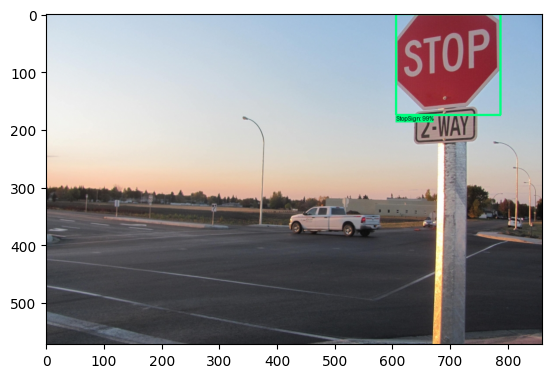

In [62]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
#!pip uninstall opencv-python-headless -y

In [85]:
cap = cv2.VideoCapture(1)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1) # Flip horizontally
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        # cap.release()
        # cv2.destroyAllWindows()
        # break
        break
cap.release()
cv2.destroyAllWindows()

for i in range(2):
    cv2.waitKey(10)

2024-02-21 12:56:24.579 python3[9401:3751784] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


## 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')